<div align="center">

<font size="5">

Zajęcia projektowe z przedmiotu:
**Głębokie uczenie i analiza obrazów**

\
**Temat:**
Wykorzystanie warunkowej sieci GAN (cGAN) do generacji obrazów

\
**Krzysztof HEWELT**
Systemy Teleinformatyczne
Wydział Elektryczny
Uniwersytet Morski w Gdyni

01.2024
</font>

</div>

# Wstęp i założenia projektowe

<u>**Tematem projektu**</u> jest wykorzystanie warunkowej sieci GAN (cGAN) do generacji obrazów. Warunkowe sieci GAN, w odróżnieniu od zwykłych sieci GAN, to takie, w których możemy decydować co ma zostać wygenerowane. Polega to na dołożeniu do sieci informacji (w projekcie: tensora o odpowiednich rozmiarach) o danej etykiecie i wykorzystywaniu jej w procesie forward pass, jak i samego treningu. Dokonano wyboru kilku zbiorów, na których będziemy uczyć naszą sieć cGAN, zbudowano sieci konwolucyjne i dekonwolucyjne dla sieci cGAN, opracowano procedurę treningu, a także sprawdzono skuteczność nauczonego modelu. Ponadto, na już wyszkolonym modelu, przeprowadzono generację obrazu o danej kategorii (np. danej cyfry/litery, kategorii odzieży). Jako jednostkę obliczeniową wykorzystano potencjał karty graficznej - technologię CUDA.

<u>**Celem projektu**</u> jest zbudowanie, wytrenowanie oraz wykorzystanie warunkowej sieci GAN do generowania obrazów o żądanej kategorii/etykiecie.

<u>**Zakres projektu obejmuje:**</u>
- wybór zbiorów danych wykorzystanych do treningu i testowania sieci cGAN,
- dobór hiperparametrów sieci cGAN,
- zbudowanie sieci Generatora obrazów oraz Dyskryminatora (krytyka),
- przeprowadzenie treningu sieci cGAN oraz ocenę skuteczności modelu na różnych zestawach danych,
- wyświetlaniu wygenerowanych obrazów przez model, a także żądanie wygenerowania obrazu o danej kategorii/etykiecie,
- koordynację obliczeń na różnych jednostkach obliczeniowych.

# Sposób realizacji

Implementacja kodu zawiera następujące sekcje:
- hiperparametry sieci cGAN (niektóre),
- pobranie i wczytanie wybranego zbioru danych,
- architekturę generatora,
- architekturę dyskryminatora,
- trening sieci cGAN,
- efekt i skuteczność modelu,
- trening sieci cGAN oraz testowanie na innych zbiorach danych.

W celu przyspieszenia treningu sieci cGAN wykorzystano technologię CUDA. Jest to technologia firmy NVIDIA, która pozwala na wykonywanie równoległych obliczeń na kartach graficznych z wykorzystaniem rdzeni CUDA.
W niniejszym projekcie autor dokonał eksperyment treningu sieci cGAN na procesorze (CPU) oraz karcie graficznej (GPU, cuda). Wykorzystanie technologii CUDA podczas treningu sieci cGAN przyspieszyło ten proces **ponad dwukrotnie** w stosunku do obliczeń wykonywanych na procesorze (CPU).

Środowisko obliczeniowe autora:
CPU: Intel Core i5 13-gen
GPU: NVIDIA Geforce GTX 1060 6GB
Liczba epok: **10**

Czas trenowania sieci cGAN z wykorzystaniem zbioru MNIST:
Czas obliczeń na procesorze: **918.92s**
Czas obliczeń na karcie graficznej: **387.39s**

#### Środowisko uruchomieniowe oraz narzędzia
Interpreter Python i biblioteki są dostarczane przez Anacondę.
**IDE:** PyCharm Professional 2023.2.5
**Python:** 3.11.5
**CUDA Toolkit:** 12.3.1
<font size="2">
Pakiet CUDA Toolkit można pobrać [stąd](https://developer.nvidia.com/cuda-downloads). Musi być zainstalowany, aby był widziany przez PyTorch'a.
Przed instalacją należy sprawdzić, czy [posiadamy kompatybilną kartę graficzną](https://developer.nvidia.com/cuda-gpus).
</font>

<br>

#### Biblioteki
Do realizacji niniejszego projektu wykorzystano następujące biblioteki:
- **PyTorch** - zapewni zbudowanie warunkowej sieci GAN, posiada wbudowane moduły odpowiadające różnym warstwom sieci neuronowych, automatyczne obliczanie gradientów (*autograd*) niezbędne do przeprowadzenia treningu sieci cGAN. W przypadku chęci i możliwości korzystania z technologii CUDA, zalecana instalacja tej biblioteki zgodnie z [instrukcją instalacji](https://pytorch.org/get-started/locally/) - należy wybrać odpowiednie środowisko, wersję CUDA Toolkit. W przypadku wybrania wersji z CUDA, zostaną doinstalowane odpowiednie biblioteki m.in. cuda-toolkit.
- **NumPy** - umożliwi wykonywanie wysoko zoptymalizowanych obliczeń matematycznych na obiektach typu *numpy array* (wielowymiarowych tablic).
- **torchvision** - zapewni zbiory danych (np. MNIST) wykorzystane do treningu i testowania sieci cGAN. Ponadto zapewni możliwość normalizacji danych i przeskalowania obrazów, a także przygotowanie siatki wygenerowanych obrazów.
- **Matplotlib** - zapewni wizualizację danych poprzez rysowanie wykresów, m.in. kosztów Generatora i Dyskryminatora, wygenerowanych rysunków przez model, podglądu rysunków ze zbiorów.
- **os** - pozwoli na tworzenie katalogów, w których przechowywane będą dane zbiorów oraz wygenerowane obrazy przez model. 
- **time** - pozwoli na mierzenie czasu, który upłynął od momentu uruchomienia treningu sieci cGAN.

<br>

#### Architektura sieci neuronowej

Opis warstw, jak i implementacja została przedstawiona odpowiednio w sekcji "Generator" i "Dyskryminator".

<br>

#### Wykorzystane zbiory danych do treningu
Do trenowania sieci cGAN oraz generowania żądanych obrazów na już wyszokolonym modelu wykorzystano następujące zbiory danych:
- **MNIST (Modified National Institute of Standards and Technology)** - zbiór odręcznie pisanych cyfr 0-9 (co daje 10 kategorii/etykiet). Zawiera 70 tys. obrazów takich cyfr, z czego 60 tys. przeznaczono jako zbiór treningowy, resztę jako testowy. Najprostszy i najpopularniejszych ze zbiorów wykorzystywanych do budowania sieci GAN.
- **FashionMNIST** - alternatywa dla MNIST, gdzie zamiast ręcznie pisanych cyfr znajdziemy obrazy spośród 10. różnych kategorii odzieży i akcesoriów. Identycznie, jak przy MNIST, znajdziemy tutaj 70 tys. obrazów, z czego 60 tys. przeznaczono na zbiór treningowy, a resztę na testowy.
- **KMNIST** - kolejna alternatywa dla MNIST. Jest to zbiór skupiający się na japońskich znakach pisma odręcznego zwanym Kuzushiji. Ze względu na kaligrafię (kształt liter) tego języka, może być nieco trudniejszy do nauki i rozróżnienia przez model cGAN. Identycznie, jak przy MNIST, znajdziemy tutaj 70 tys. obrazów, z czego 60 tys. przeznaczono na zbiór treningowy, a resztę na testowy.

Każdy obrazek we wszystkich zbiorach danych jest w odcieniach szarości, a jego wymiary to 28x28 pikseli (które potem zostaną przeskalowane do 32x32 pikseli).
Ze względu na rozmiary plików tych zbiorów, nie są one dołączone wraz z notatnikiem. W przypadku braku danych zbiorów w katalogu "data" zostaną pobrane automatycznie.
Trening sieci cGAN został przeprowadzony na wszystkich trzech zbiorach danych, gdzie przedstawiono czas treningu, wartości kosztu Generatora i Dyskryminatora, wygenerowane obrazy, a także wygenerowanie konkretnego (o podanej etykiecie/kategorii) obrazka. Ponadto, po wczytaniu wybranego zbioru, wyświetlono kilka obrazów z tego zbioru.

# Implementacja sieci cGAN

**Skrypt napisano na podstawie:**
[https://github.com/s-chh/Pytorch-cGAN-conditional-GAN](https://github.com/s-chh/Pytorch-cGAN-conditional-GAN)
[https://medium.com/@ngoodger_7766/simple-gan-using-pytorch-99a41691b83f](https://medium.com/@ngoodger_7766/simple-gan-using-pytorch-99a41691b83f)
[https://learnopencv.com/conditional-gan-cgan-in-pytorch-and-tensorflow/](https://learnopencv.com/conditional-gan-cgan-in-pytorch-and-tensorflow/)

### Niezbędne importy bibliotek

In [16]:
from torch import optim
import os
import torchvision.utils as vutils
import numpy as np
from torchvision import datasets
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import time

## Wczytywanie i przygotowywanie danych

### Parametry oraz wybór jednostki obliczeniowej

Przed przystąpieniem do budowania właściwej sieci cGAN (Generatora i Dyskryminatora) określono wartości parametrów wykorzystywanych do budowania tych sieci. Przede wszystkim dokonano przeskalowania obrazów do wymiarów 32x32 pikseli (co ułatwiło obliczenie rozmiaru poszczególnych warstw w sieci, a także powiększyło same obrazy). Tak dobrane wymiary rysunków, zapewniło większą jakość generowania obrazów, gdzie np. wymiary 8x8 rysunków tego samego zbioru (ale zapewnianą przez bibliotekę "Scikit-learn") powodowało generowanie obrazów w znacznie gorszej jakości. Określono liczbę epok na 10 (podczas treningu można zauważyć, że aż nadto). Liczba kanałów (zgodnie z wybranymi zbiorami) wynosi 1.
W poniższym kodzie zapisano w zmiennej "transform" co dodatkowo chcemy zrobić z danymi ze zbiorów, tutaj: przeskalowanie obrazów do podanych wymiarów, przekształcenie danych do tensora oraz normalizacja danych (średnia 0,5 i odch. stand. 0,5). Ponadto, dokonywany jest wybór jednostki obliczeniowej, czyli gdzie mamy wykonywać obliczenia: na GPU czy na CPU.

In [17]:
BATCH_SIZE = 64    # rozmiar batch
NOISE_SIZE = 64    # ilość kanałów, jakie będzie miał wygenerowany szum
IMG_CHANNELS = 1   # ilość kanałów w generowanych obrazkach
NUM_EPOCHS = 10    # jak długo będziemy trenować naszą sieć cGAN, domyślnie 10
IMAGE_SIZE = 32    # wymiary rysunku po przeskalowaniu, domyślnie 32 (co odpowiada wymiarom 32x32)

# Przeskalowanie rysunków do żądanych wymiarów, przekształcenie danych do tensora oraz normalizacja danych
transform = transforms.Compose([transforms.Resize([IMAGE_SIZE, IMAGE_SIZE]), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

# wybór jednostki obliczeniowej (jeśli posiadamy sprzęt, który wspiera technologię CUDA (+ oprogramowanie), zostanie wybrany ten sprzęt, w przeciwnym przypadku obliczenia będą wykonywać się na procesorze)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("DEVICE:", device)

DEVICE: cuda


### Funkcje odpowiadające za wybór zbioru danych oraz przygotowanie ścieżek

Poniższe funkcje zapewniają możliwość:
- tworzenia odpowiednich katalogów dla podanych zbiorów danych,
- pobrania i wczytania odpowiednich zbiorów,
- przygotowania obiektu DataLoader,
- wyświetlenia kilka obrazów ze zbioru.

Funkcje te zapewnią szybką zmianę zbioru danych, na którym będzie szkolony nasz model.

In [18]:
def set_directory_for_dataset(dataset):
    """
    Tworzy katalogi dla wczytywanego zbioru. \n
    Argumenty: \n
    - dataset - nazwa katalogów, jakie mają zostać utworzone \n
    Zwraca: \n
    - dataset_path - ścieżkę do katalogu, gdzie będą znajdować się pliki pobranego zestawu danych \n
    - samples_path - ścieżkę do katalogu, gdzie będziemy przechowywać wygenerowane obrazy
    """
    dataset_path = os.path.join('./data', dataset)
    samples_path = os.path.join('./samples', dataset)
    os.makedirs(dataset_path, exist_ok=True)
    os.makedirs(samples_path, exist_ok=True)
    
    return dataset_path, samples_path


def set_dataset(ds_name, batch_size=BATCH_SIZE):
    """
    Wybiera zbiór danych i tworzy niezbędne ścieżki. \n
    Argumenty: \n
    - ds_name - nazwa zbioru danych, jaki ma zostać wczytany/pobrany \n
    - batch_size - rozmiar batch \n
    Zwraca: \n
    - dataset - wczytany zbiór danych \n
    - data_loader - obiekt DataLoader zawierający dane z wybranego zbioru \n
    - dataset_path - ścieżkę do katalogu, gdzie znajdują się pliki wybranego zestawu danych \n
    - samples_path - ścieżkę do katalogu, gdzie będą przechowywane wygenerowane obrazy
    """
    dataset_path, samples_path = set_directory_for_dataset(ds_name)
    
    if ds_name == 'MNIST':
        dataset = datasets.MNIST(dataset_path, train=True, download=True, transform=transform)
    elif ds_name == 'FashionMNIST':
        dataset = datasets.FashionMNIST(dataset_path, train=True, download=True, transform=transform)
    elif ds_name == 'KMNIST':
        dataset = datasets.KMNIST(dataset_path, train=True, download=True, transform=transform)
    else:
        print(f'The dataset: {ds_name} does not exists!')
        print('Available datasets: MNIST, FashionMNIST, KMNIST')
        exit(0)
        
    data_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    
    return dataset, data_loader, dataset_path, samples_path


def show_example_images(dataset):
    """
    Wyświetla cztery wybrane obrazy z danego zbioru. \n
    Argumenty: \n
    - dataset - wybrany zbiór danych
    """
    example_images = torch.cat([dataset[0][0], dataset[100][0], dataset[200][0], dataset[300][0]], dim=2)
    plt.imshow(example_images.numpy().squeeze(), cmap='gray')

### Wybór zbioru danych MNIST oraz wyświetlenie przykładowych obrazków
Na początku będziemy bazować na zbiorze MNIST, gdzie będziemy szkolić i testować nasz model cGAN. Poniżej przedstawiono wczytanie tego zbioru i wyświetlenie przykładowych obrazów z tego zbioru. Można zauważyć, że obrazy zostały już przeskalowane zgodnie z podanymi wcześniej wymiarami obrazów.

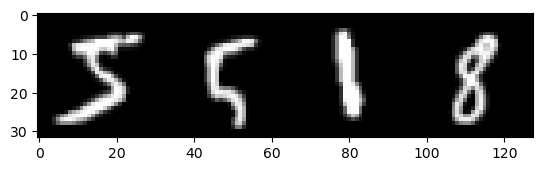

In [19]:
dataset, data_loader, dataset_path, samples_path = set_dataset('MNIST')
show_example_images(dataset)

### Generator
Poniżej przedstawiono architekturę Generatora, który składa się z następujących warstw:
`Embedding` -> 3x (`ConvTranspose2d` -> `BatchNorm2d` -> `ReLU`) -> (`ConvTranspose2d` -> `Tanh`).

W porównaniu do zwykłej sieci GAN dodano tutaj warstwy:
- `Embedding` - służy do reprezentowania etykiety klasy jako wektora liczbowego. Na przykład, jeśli mamy 10 klas (o numerach od 0 do 9), to dla każdej z tych klas warstwa Embedding generuje wektor o określonej długości (`label_embed_size`). Wartości w tym wektorze są uczone podczas treningu modelu, aby odzwierciedlały pewne cechy związane z daną klasą.
- dodatkową warstwę dekonwolucyjną.

Ponadto, jako argumenty, które należy podać przy inicjalizacji Generatora dodano:
- `num_classes` - liczba etykiet/klas (np. liczby od 0 do 9, kategorie ubrań),
- `label_embed_size` - długość wektora w warstwie `Embedding`.

Określono domyślne wartości hiperparametrów:
- `num_classes` 10,
- `label_embed_size` 5,
- `padding` 1,
- `stride` 2.
- `kernel_size` 4,
- na poszczególnych warstwach sieci dekonwolucyjnej liczba kanałów będzie wynosiła:
    * 4 * `input_channels`,
    * 2 * `input_channels`,
    * `input_channels`.


In [20]:
class Generator(torch.nn.Module):
    """
    Model generatora wchodzącego w skład sieci cGAN:
    3x (ConvTranspose -> BatchNorm -> ReLU) -> (ConvTranspose -> Tanh)
    """
    
    def __init__(self, input_channels, output_channels, num_classes=10, label_embed_size=5, padding=1, stride=2):
        """
        Definiuje budowę sieci. \n
        Argumenty: \n
        - input_channels - ilość kanałów w wejściowych obrazkach (skalar, int), \n 
        - output_channel - ilość kanałów w wyjściowych obrazkach (skalar, int), \n 
        - num_classes - liczba klas/etykiet (skalar, int, domyślnie 10), \n
        - label_embed_size - rozmiar wektora w warstwie Embeddding (skalar, int, domyślnie 5), \n
        - padding - (opcjonalnie) ,,grubość'' ramki z zer dodawanej do obrazka (skalar, int, domyślnie 1) \n
        - stride - (opcjonalnie) co ile pikseli obrazka wykonywana jest konwolucja (skalar, int, domyślnie 2).
        """
        super().__init__()
        
        num_conv_channels = [input_channels * 4, input_channels * 2, input_channels]  # ilość kanałów po kolejnych dekonwolucjach
        kernel_size = 4  # wielkość filtra przy kolejnych dekonwolucjach
        
        # Budowanie sieci Generatora dla sieci cGAN:
        # Warstwa Embedding
        self.label_embedding = torch.nn.Embedding(num_classes, label_embed_size)
        
        # Kolejne warstwy sieci
        self.first_layer = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(
                in_channels=input_channels + label_embed_size,
                out_channels=num_conv_channels[0],
                kernel_size=kernel_size,
                padding=0,
                stride=stride
            ),
            torch.nn.BatchNorm2d(num_features=num_conv_channels[0]),
            torch.nn.ReLU()
        )
        
        self.second_layer = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(
                in_channels=num_conv_channels[0],
                out_channels=num_conv_channels[1],
                kernel_size=kernel_size,
                padding=padding,
                stride=stride
            ),
            torch.nn.BatchNorm2d(num_features=num_conv_channels[1]),
            torch.nn.ReLU()
        )
        
        self.third_layer = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(
                in_channels=num_conv_channels[1],
                out_channels=num_conv_channels[2],
                kernel_size=kernel_size,
                padding=padding,
                stride=stride
            ),
            torch.nn.BatchNorm2d(num_features=num_conv_channels[2]),
            torch.nn.ReLU()
        )
        
        self.fourth_layer = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(
                in_channels=num_conv_channels[2],
                out_channels=output_channels,
                kernel_size=kernel_size,
                padding=padding,
                stride=stride
            ),
            torch.nn.Tanh()
        )
        
    def forward(self, x, label):
        """ 
        Definiuje przepływ danych w sieci. \n
        Argumenty: \n
        - x - dane wejściowe, torch.tensor zawierający szum,  którego generowany ma być obraz, \n
        - label - etykieta, która zostanie dodana do szumu \n
        Zwraca: x - odpowiedź sieci w postaci wygenerowanych obrazów, torch.tensor
        """
        # W odróżnieniu od zwykłej sieci GAN, do szumu należy dołączyć etykietę (label) z wykorzystaniem warstwy Embedding.
        # Takie dołączenie należy poprzedzić odpowiednim przekształceniem szumu i etykiety do wymaganego kształtu.
        x = x.reshape([x.shape[0], -1, 1, 1])
        label_embed = self.label_embedding(label)
        label_embed = label_embed.reshape([label_embed.shape[0], -1, 1, 1])
        
        # Dołączenie etykiety do szumu
        x = torch.cat((x, label_embed), dim=1)
        
        # Połączenie warstw w jedną spójną sieć
        x = self.first_layer(x)
        x = self.second_layer(x)
        x = self.third_layer(x)
        x = self.fourth_layer(x)
        return x

### Dyskryminator
Poniżej przedstawiono architekturę Dyskryminatora, który składa się z następujących warstw:
`Embedding` -> 3x (`Conv2d` -> `BatchNorm2d` -> `LeakyReLU`) -> (`Conv2d` -> `Sigmoid`).

W porównaniu do zwykłej sieci GAN dodano tutaj warstwy:
- `Embedding` - służy do reprezentowania etykiety klasy jako wektora liczbowego. Na przykład, jeśli mamy 10 klas (o numerach od 0 do 9), to dla każdej z tych klas warstwa Embedding generuje wektor o określonej długości (`label_embed_size`). Wartości w tym wektorze są uczone podczas treningu modelu, aby odzwierciedlały pewne cechy związane z daną klasą.
- dodatkową warstwę dekonwolucyjną.

Ponadto, jako argumenty, które należy podać przy inicjalizacji Generatora dodano:
- `num_classes` - liczba etykiet/klas (np. liczby od 0 do 9, kategorie ubrań),
- `label_embed_size` - długośc wektora w warstwie `Embedding`.

Określono domyślne wartości hiperparametrów:
- `num_classes` 10,
- `padding` 1,
- `stride` 2.
- `kernel_size` 4,
- na poszczególnych warstwach sieci dekonwolucyjnej liczba kanałów będzie wynosiła:
    * `input_channels`,
    * 2 * `input_channels`,
    * 4 * `input_channels`.

In [21]:
class Discriminator(torch.nn.Module):
    """
    Model dyskryminatora wchodzącego w skład sieci cGAN:
    3x (Conv2d -> BatchNorm -> LeakyReLU) -> (Conv2d -> Sigmoid)
    """
    def __init__(self, input_channels, output_channels, num_classes=10, padding=1, stride=2):
        super().__init__()
        
        num_conv_channels = [input_channels, input_channels * 2, input_channels * 4]  # ilość kanałów po kolejnych konwolucjach
        kernel_size = 4  # wielkość filtra przy kolejnych konwolucjach
        
        # Budowanie sieci Dyskryminatora dla sieci cGAN:
        # Warstwa Embedding
        self.label_embedding = torch.nn.Embedding(num_classes, IMAGE_SIZE*IMAGE_SIZE)
        
        # Kolejne warstwy sieci
        self.first_layer = torch.nn.Sequential(
            torch.nn.Conv2d(
                in_channels=2,
                out_channels=num_conv_channels[0],
                kernel_size=kernel_size,
                padding=padding,
                stride=stride
            ),
            torch.nn.BatchNorm2d(num_features=num_conv_channels[0]),
            torch.nn.LeakyReLU() 
        )
        
        self.second_layer = torch.nn.Sequential(
            torch.nn.Conv2d(
                in_channels=num_conv_channels[0],
                out_channels=num_conv_channels[1],
                kernel_size=kernel_size,
                padding=padding,
                stride=stride
            ),
            torch.nn.BatchNorm2d(num_features=num_conv_channels[1]),
            torch.nn.LeakyReLU() 
        )
        
        self.third_layer = torch.nn.Sequential(
            torch.nn.Conv2d(
                in_channels=num_conv_channels[1],
                out_channels=num_conv_channels[2],
                kernel_size=kernel_size,
                padding=padding,
                stride=stride
            ),
            torch.nn.BatchNorm2d(num_features=num_conv_channels[2]),
            torch.nn.LeakyReLU() 
        )
        
        self.fourth_layer = torch.nn.Sequential(
            torch.nn.Conv2d(
                in_channels=num_conv_channels[2],
                out_channels=output_channels,
                kernel_size=kernel_size,
                padding=0,
                stride=1
            ),
            torch.nn.Sigmoid() 
        )
        
    def forward(self, x, label):
        """
        Definiuje przepływ danych w sieci. \n
        Argumenty: \n
        - x - dane wejściowe, torch.tensor zawierający obrazki do analizy, \n
        - labels - etykiety, torch.tensor zawierający klasę każdego obrazka, \n
        Zwraca: \n
        - x - odpowiedź sieci: 0 (obrazek fałszywy) - 1 (obrazek prawdziwy)
        """
        # Podobnie jak przy Generatorze, należy odpowiednio dostosować kształty etykiety.
        # Nie ma potrzeby dostosowywania kształtów obrazka.
        label_embed = self.label_embedding(label)
        label_embed = label_embed.reshape([label_embed.shape[0], 1, IMAGE_SIZE, IMAGE_SIZE])
        
        # Dołączanie etykiety do obrazka
        x = torch.cat((x, label_embed), dim=1)
        
        # Połączenie warstw w jedną spójną sieć
        x = self.first_layer(x)
        x = self.second_layer(x)
        x = self.third_layer(x)
        x = self.fourth_layer(x)
        return x.squeeze()

### Generowanie szumu
Podobnie jak w przypadku zwykłej sieci GAN, napisano funkcję odpowiadającą za generowanie szumu, na podstawie ilości obrazów oraz wielkości próbki szumu (ilość kanałów rysunku). Tutaj także po raz pierwszy wskazujemy, gdzie mamy wykonywać obliczenia (GPU, CPU).

In [22]:
def generate_noise(num_samples, channels):
    """
    Funkcja dokonująca generacji losowego szumu (z rozkładu normalnego N(0,1)), z którego generowane będą obrazy. \n
    Argumenty: \n
    - num_samples - ilość obrazów, które za pomocą tego szumu chcemy wygenerować (skalar, int), \n
    - channels - wielkość próbki szumu (skalar, int) \n
    Zwraca: noise - torch tensor zawierający wygenerowany szum, shape=(num_samples, channels)
    """
    return torch.randn(size=(num_samples, channels)).to(device)

### Wyświetlanie obrazów


In [23]:
def generate_imgs(gen, z, fixed_label, epoch=0):
    """
    Dokonuje generacji siatki obrazów o żądanych etykietach, wyświetlenie tych obrazów, a także zapisanie ich. \n
    Argumenty: \n
    - gen - wyszkolony model Generatora, który zostanie wykorzystany do generowania obrazów, \n
    - z - wygenerowany szum, \n
    - fixed_label - etykieta o odpowiednich rozmiarach tensora, czyli to co chcemy wygenerować, \n
    - epoch - numer epoki, etykieta do nazwy obrazu.
    """
    gen.eval()
    fake_imgs = gen(z, fixed_label)
    fake_imgs = (fake_imgs + 1) / 2
    fake_imgs_ = vutils.make_grid(fake_imgs.cpu(), normalize=False, nrow=10)  # tutaj musimy wykonać obliczenia na CPU
    npimg = fake_imgs_.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest', cmap='gray')
    plt.show()
    vutils.save_image(fake_imgs_, os.path.join(samples_path, 'sample_' + str(epoch) + '.png'))


def show_gen_disc_losses(gen_losses, disc_losses):
    """
    Wyświetla na wykresie wartości kosztu dla Generatora i Dyskryminatora w poszczególnych iteracjach treningu. \n
    Argumenty: \n
    - gen_losses - wartości kosztu dla Generatora, \n
    - disc_losses - wartości kosztu dla Dyskryminatora.
    """
    plt.title("Wartości kosztu dla Generatora i Dyskryminatora")
    plt.plot(gen_losses,label="Generator")
    plt.plot(disc_losses,label="Dyskryminator")
    plt.xlabel("Iteracja")
    plt.ylabel("Wartość kosztu")
    plt.legend()
    plt.show()

### Inicjalizacja Generatora i Dyskryminatora

In [24]:
gen = Generator(NOISE_SIZE, IMG_CHANNELS).to(device)
disc = Discriminator(NOISE_SIZE, IMG_CHANNELS).to(device)

# Wyświetlenie podsumowania o Generatorze i Dyskryminatorze - architekturę tych sieci
print(gen)
print(disc)

Generator(
  (label_embedding): Embedding(10, 5)
  (first_layer): Sequential(
    (0): ConvTranspose2d(69, 256, kernel_size=(4, 4), stride=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (second_layer): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (third_layer): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (fourth_layer): Sequential(
    (0): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): Tanh()
  )
)
Discriminator(
  (label_embedding): Embedding(10, 1024)
  (first_layer): Sequential(
    (0): Conv2d(2, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))


### Trening sieci cGAN
Jako miarę oceny skuteczności (obliczanie funkcji kosztu) wykorzystano BinaryCrossEntropy. Co epokę wyświetlana będzie siatka wygenerowanych obrazów z poszczególnych kategorii/etykiet, tj. 10x10, gdzie wiersz odpowiada za obrazy wygenerowane z wykorzystaniem kolejnej etykiety, a wiersz to kolejne wersje obrazów o tej samej etykiecie. Ponadto, co epokę wyświetlane są wartości kosztów Generatora i Dyskryminatora, czas jaki upłynął od momentu uruchomienia treningu, a także sam postęp w uczeniu. Ostatecznie wyświetlamy na wykresie wartości tych kosztów, czas treningu, wartości końcowe kosztów oraz średnie wartości. Jako metodę optymalizacji przyjęto algorytm Adam z wcześniej określonymi hiperparametrami beta oraz learning rate.
W przeciwieństwie do zwykłych sieci GAN, należało dodać etykiety do danych, co zapewniło kontrolę nad treningiem modelu.

In [25]:
def train_cgan(data_loader, noise_size):
    step = 0
    lr = 0.0002
    betas = (0.5, 0.999)

    # Obiekty związane z metodą optymalizacji - Adam (dla obu sieci)
    g_opt = optim.Adam(gen.parameters(), lr=lr, betas=betas)
    d_opt = optim.Adam(disc.parameters(), lr=lr, betas=betas)
    
    # Funkcja kosztu - BinaryCrossEntropy
    loss_fn = torch.nn.BCELoss()
    
    # Etykiety
    # Siatka: 10x10 obrazków
    # Wiersz: kolejny cyfra/znak ma generować się w kolejnych kolumnach 
    # Kolumna: kolejna wersja tej samej cyfry
    fixed_z = torch.randn(10*10, noise_size).to(device)
    fixed_label = torch.arange(0, 10).to(device)
    fixed_label = torch.repeat_interleave(fixed_label, 10).to(device)
    real_label = torch.ones(noise_size).to(device)
    fake_label = torch.zeros(noise_size).to(device)
    
    # Tablice przechowujące wartości kosztu dla Generatora i Dyskryminatora
    generator_losses, discriminator_losses = [], []

    # Odliczanie czasu
    start_time = time.time()
    
    # Przełączenie sieci w tryb treningu
    gen.train()
    disc.train()
    for epoch in range(NUM_EPOCHS):
        for i, data in enumerate(data_loader):
            step += 1
    
            # Wczytaj dane
            x_real, x_label = data
            x_real, x_label = x_real.to(device), x_label.to(device)
            
            # Wygeneruj szum
            noise = generate_noise(x_real.shape[0], noise_size)
    
            # Generuj obraz na podstawie szumu i etykiety
            x_fake = gen(noise, x_label)
    
            # OPTYMALIZACJA DYSKRYMINATORA
            fake_out = disc(x_fake.detach(), x_label)
            real_out = disc(x_real.detach(), x_label)
            d_loss = (loss_fn(fake_out, fake_label) + loss_fn(real_out, real_label)) / 2
    
            # Zeruj gradienty, wykonaj propagację wsteczną kosztu oraz wykonaj 1 iterację algorytmu optymalizacji dla Dyskryminatora
            d_opt.zero_grad()
            d_loss.backward()
            d_opt.step()
    
    
            # OPTYMALIZACJA GENERATORA
            fake_out = disc(x_fake, x_label)
            g_loss = loss_fn(fake_out, real_label)
    
            # Zeruj gradienty, wykonaj propagację wsteczną kosztu oraz wykonaj 1 iterację algorytmu optymalizacji dla Generatora
            g_opt.zero_grad()
            g_loss.backward()
            g_opt.step()
            
            # Zapisz wartości kosztów dla Dyskryminatora oraz Generatora
            generator_losses.append(g_loss.item())
            discriminator_losses.append(d_loss.item())
    
            # Co 100 iteracji wyświetl postęp i jakość treningu oraz wygenerowane obrazy 
            if i % 100 == 0:
                elapsed_time = time.time() - start_time
                print(f"[{epoch+1:>2}/{NUM_EPOCHS}]" 
                      + f"[{step:>7}][{elapsed_time:8.2f}s]\t" 
                      + f"d_loss/g_loss: {d_loss.item():4.2}/{g_loss.item():4.2}")
        
        generate_imgs(gen, fixed_z, fixed_label, epoch=epoch+1)
    
    # Wyświetl skuteczność (koszty) modelu oraz czas treningu
    show_gen_disc_losses(generator_losses, discriminator_losses)
    elapsed_time = time.time() - start_time
    mean_d_loss = np.array(discriminator_losses).mean()
    mean_g_loss = np.array(generator_losses).mean()
    print(f"Elapsed time:{elapsed_time:8.2f}s\t"
          +f"d_loss/g_loss: {d_loss.item():4.2}/{g_loss.item():4.2}\t"
          +f"mean d_loss/g_loss: {mean_d_loss:4.2}/{mean_g_loss:4.2}")

### Efekty treningu sieci cGAN
Teraz możemy zobaczyć efekty prac. Poniżej będzie wyświetlany postęp w uczeniu: [numer epoki/liczba epok][iteracja][czas jaki upłynął od momentu rozpoczęcia treningu][wartości kosztów Generatora i Dyskryminatora], a także siatkę wygenerowanych obrazów. Na końcu zostanie wyświetlone podsumowanie w postaci wykresu kosztów Generatora i Dyskryminatora i wartości średnie tych kosztów.
Jako testowanie skuteczności modeli autor przyjął wizualną weryfikację generowanych obrazów (zarówno w siatce, jak i pojedynczych obrazów).

[ 1/10][      1][    0.18s]	d_loss/g_loss: 0.71/ 1.0
[ 1/10][    101][    4.60s]	d_loss/g_loss: 0.27/ 2.1
[ 1/10][    201][    8.95s]	d_loss/g_loss: 0.24/ 2.3
[ 1/10][    301][   13.21s]	d_loss/g_loss: 0.33/ 3.2
[ 1/10][    401][   17.23s]	d_loss/g_loss: 0.54/ 2.6
[ 1/10][    501][   21.70s]	d_loss/g_loss: 0.44/ 1.2
[ 1/10][    601][   26.34s]	d_loss/g_loss: 0.48/ 2.2
[ 1/10][    701][   30.25s]	d_loss/g_loss: 0.41/ 2.0
[ 1/10][    801][   34.12s]	d_loss/g_loss: 0.51/ 2.0
[ 1/10][    901][   38.01s]	d_loss/g_loss: 0.55/ 1.8


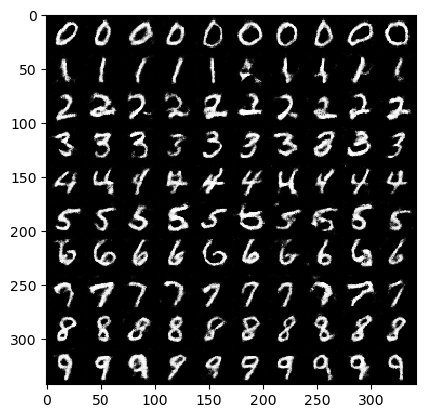

[ 2/10][    938][   39.62s]	d_loss/g_loss: 0.41/ 1.2
[ 2/10][   1038][   43.75s]	d_loss/g_loss: 0.51/ 1.1
[ 2/10][   1138][   47.73s]	d_loss/g_loss: 0.59/ 2.4
[ 2/10][   1238][   51.75s]	d_loss/g_loss: 0.49/ 2.2
[ 2/10][   1338][   55.77s]	d_loss/g_loss: 0.51/0.71
[ 2/10][   1438][   60.78s]	d_loss/g_loss: 0.61/ 1.1
[ 2/10][   1538][   65.86s]	d_loss/g_loss: 0.48/ 0.9
[ 2/10][   1638][   70.19s]	d_loss/g_loss: 0.47/ 1.1
[ 2/10][   1738][   74.23s]	d_loss/g_loss:  0.4/ 1.4
[ 2/10][   1838][   78.22s]	d_loss/g_loss:  0.5/0.83


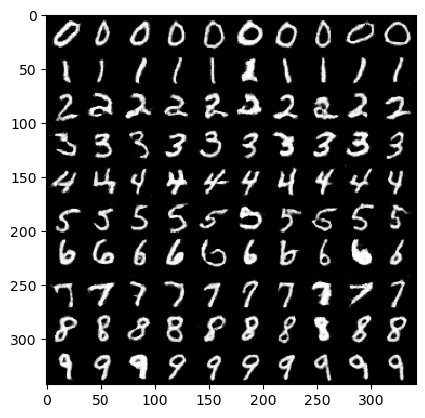

[ 3/10][   1875][   79.76s]	d_loss/g_loss: 0.48/ 1.4
[ 3/10][   1975][   83.72s]	d_loss/g_loss: 0.44/ 2.5
[ 3/10][   2075][   87.67s]	d_loss/g_loss: 0.47/ 2.7
[ 3/10][   2175][   91.57s]	d_loss/g_loss: 0.43/ 2.5
[ 3/10][   2275][   95.44s]	d_loss/g_loss: 0.55/ 3.9
[ 3/10][   2375][   99.35s]	d_loss/g_loss: 0.25/ 3.4
[ 3/10][   2475][  103.26s]	d_loss/g_loss: 0.27/0.99
[ 3/10][   2575][  107.19s]	d_loss/g_loss:  0.1/ 3.0
[ 3/10][   2675][  111.07s]	d_loss/g_loss: 0.16/ 2.9
[ 3/10][   2775][  114.99s]	d_loss/g_loss: 0.072/ 3.6


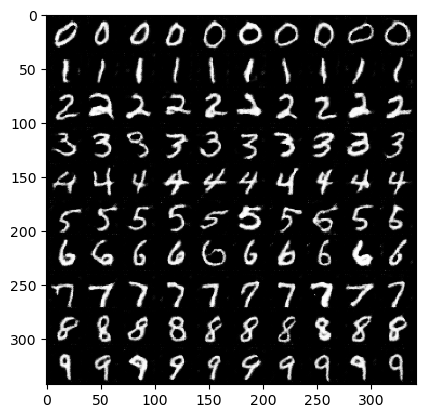

[ 4/10][   2812][  116.54s]	d_loss/g_loss: 0.065/ 3.5
[ 4/10][   2912][  120.46s]	d_loss/g_loss: 0.085/ 3.4
[ 4/10][   3012][  124.30s]	d_loss/g_loss: 0.44/ 3.7
[ 4/10][   3112][  128.20s]	d_loss/g_loss: 0.034/ 4.3
[ 4/10][   3212][  132.23s]	d_loss/g_loss: 0.21/ 1.8
[ 4/10][   3312][  136.10s]	d_loss/g_loss: 0.035/ 3.9
[ 4/10][   3412][  140.06s]	d_loss/g_loss: 0.11/ 3.1
[ 4/10][   3512][  143.88s]	d_loss/g_loss: 0.046/ 3.8
[ 4/10][   3612][  147.68s]	d_loss/g_loss: 0.31/ 2.6
[ 4/10][   3712][  151.58s]	d_loss/g_loss: 0.08/ 4.4


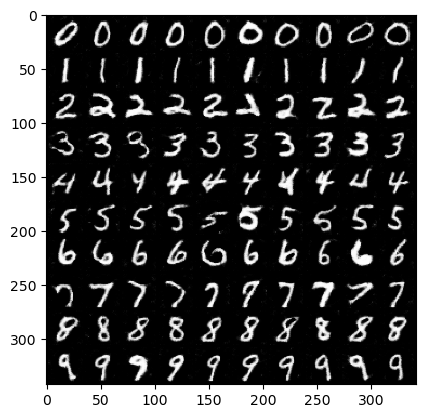

[ 5/10][   3749][  153.15s]	d_loss/g_loss: 0.029/ 4.7
[ 5/10][   3849][  157.03s]	d_loss/g_loss: 0.023/ 5.0
[ 5/10][   3949][  160.99s]	d_loss/g_loss: 0.74/ 1.9
[ 5/10][   4049][  164.84s]	d_loss/g_loss: 0.027/ 4.3
[ 5/10][   4149][  168.72s]	d_loss/g_loss: 0.022/ 4.4
[ 5/10][   4249][  172.64s]	d_loss/g_loss: 0.029/ 4.4
[ 5/10][   4349][  176.49s]	d_loss/g_loss: 0.02/ 4.1
[ 5/10][   4449][  180.35s]	d_loss/g_loss: 0.018/ 5.7
[ 5/10][   4549][  184.32s]	d_loss/g_loss: 0.023/ 4.7
[ 5/10][   4649][  188.29s]	d_loss/g_loss: 0.013/ 5.4


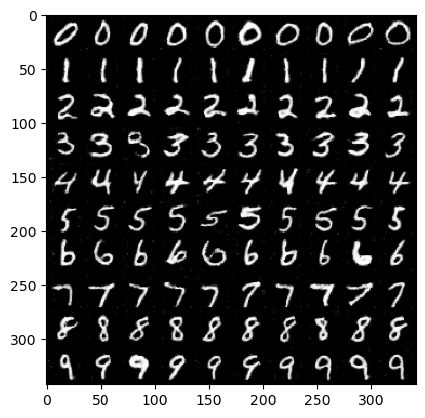

[ 6/10][   4686][  189.82s]	d_loss/g_loss: 0.06/ 6.4
[ 6/10][   4786][  193.89s]	d_loss/g_loss: 0.025/ 5.7
[ 6/10][   4886][  197.76s]	d_loss/g_loss: 0.038/ 4.5
[ 6/10][   4986][  201.69s]	d_loss/g_loss: 0.02/ 5.4
[ 6/10][   5086][  205.58s]	d_loss/g_loss: 0.011/ 5.8
[ 6/10][   5186][  209.70s]	d_loss/g_loss: 0.012/ 4.9
[ 6/10][   5286][  214.62s]	d_loss/g_loss: 0.23/ 3.2
[ 6/10][   5386][  219.61s]	d_loss/g_loss: 0.15/ 3.3
[ 6/10][   5486][  224.59s]	d_loss/g_loss: 0.027/ 5.0
[ 6/10][   5586][  229.47s]	d_loss/g_loss: 0.023/ 4.9


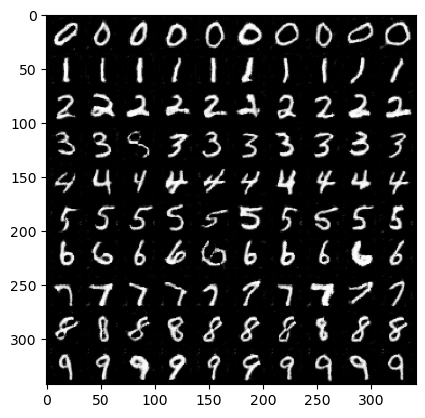

[ 7/10][   5623][  231.45s]	d_loss/g_loss: 0.016/ 5.8
[ 7/10][   5723][  236.38s]	d_loss/g_loss: 0.01/ 6.1
[ 7/10][   5823][  241.36s]	d_loss/g_loss: 0.012/ 5.4
[ 7/10][   5923][  246.42s]	d_loss/g_loss: 0.026/ 4.7
[ 7/10][   6023][  250.75s]	d_loss/g_loss: 0.015/ 6.8
[ 7/10][   6123][  254.75s]	d_loss/g_loss: 0.0098/ 4.9
[ 7/10][   6223][  258.72s]	d_loss/g_loss: 0.0068/ 6.4
[ 7/10][   6323][  262.65s]	d_loss/g_loss: 0.15/ 3.1
[ 7/10][   6423][  266.48s]	d_loss/g_loss: 0.25/ 2.2
[ 7/10][   6523][  270.32s]	d_loss/g_loss: 0.025/ 5.1


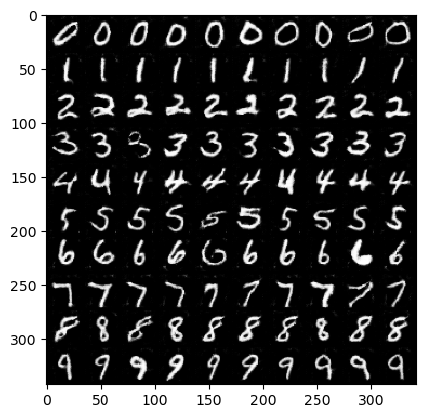

[ 8/10][   6560][  271.85s]	d_loss/g_loss: 0.018/ 4.8
[ 8/10][   6660][  275.79s]	d_loss/g_loss: 0.0064/ 6.1
[ 8/10][   6760][  279.75s]	d_loss/g_loss: 0.017/ 7.1
[ 8/10][   6860][  283.76s]	d_loss/g_loss: 0.0032/ 6.3
[ 8/10][   6960][  287.74s]	d_loss/g_loss: 0.0063/ 8.1
[ 8/10][   7060][  291.76s]	d_loss/g_loss: 0.12/ 2.8
[ 8/10][   7160][  295.69s]	d_loss/g_loss: 0.11/ 3.6
[ 8/10][   7260][  300.00s]	d_loss/g_loss: 0.081/ 3.2
[ 8/10][   7360][  303.98s]	d_loss/g_loss: 0.064/ 4.8
[ 8/10][   7460][  307.95s]	d_loss/g_loss: 0.024/ 5.2


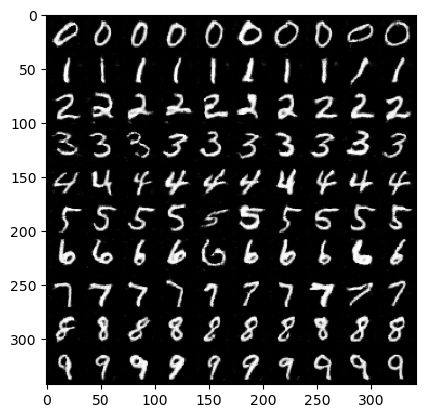

[ 9/10][   7497][  309.53s]	d_loss/g_loss: 0.015/ 5.5
[ 9/10][   7597][  313.48s]	d_loss/g_loss: 0.12/ 3.3
[ 9/10][   7697][  317.47s]	d_loss/g_loss: 0.014/ 5.0
[ 9/10][   7797][  321.43s]	d_loss/g_loss: 0.011/ 5.4
[ 9/10][   7897][  325.43s]	d_loss/g_loss: 0.016/ 5.2
[ 9/10][   7997][  329.62s]	d_loss/g_loss: 0.02/ 6.4
[ 9/10][   8097][  333.74s]	d_loss/g_loss: 0.016/ 6.5
[ 9/10][   8197][  337.79s]	d_loss/g_loss: 0.0075/ 6.1
[ 9/10][   8297][  341.71s]	d_loss/g_loss: 0.003/ 6.2
[ 9/10][   8397][  345.60s]	d_loss/g_loss: 0.0059/ 6.4


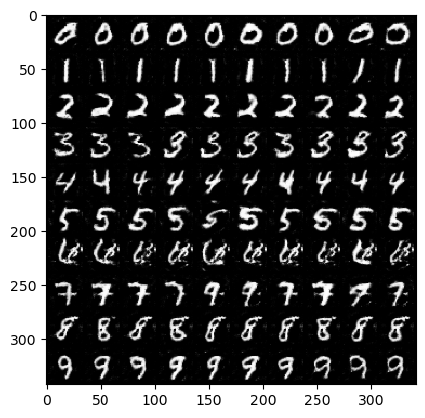

[10/10][   8434][  347.20s]	d_loss/g_loss: 0.0075/ 5.8
[10/10][   8534][  351.11s]	d_loss/g_loss: 0.0036/ 6.9
[10/10][   8634][  355.16s]	d_loss/g_loss: 0.021/ 4.4
[10/10][   8734][  359.28s]	d_loss/g_loss: 0.026/ 5.7
[10/10][   8834][  364.32s]	d_loss/g_loss: 0.025/ 5.1
[10/10][   8934][  368.58s]	d_loss/g_loss: 0.0044/ 5.9
[10/10][   9034][  372.54s]	d_loss/g_loss: 0.0068/ 5.7
[10/10][   9134][  376.59s]	d_loss/g_loss: 0.0035/ 6.7
[10/10][   9234][  380.52s]	d_loss/g_loss: 0.0047/ 6.8
[10/10][   9334][  384.49s]	d_loss/g_loss: 0.041/ 5.3


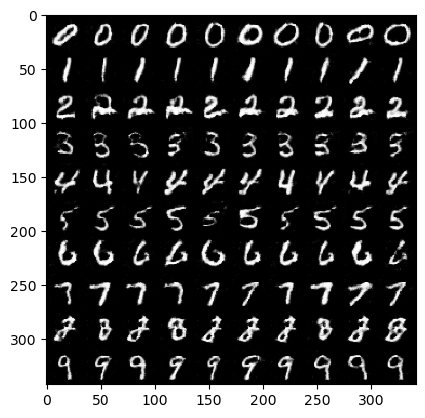

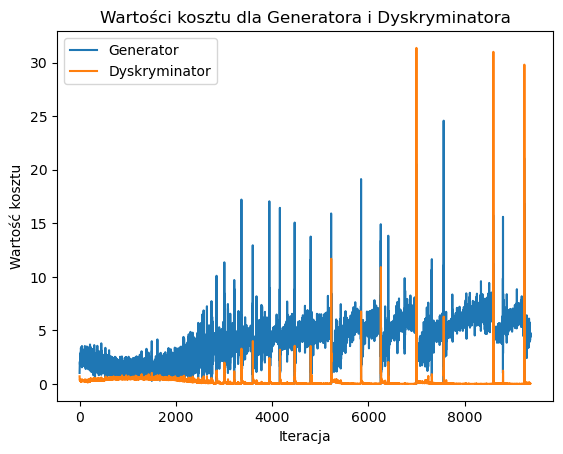

Elapsed time:  386.12s	d_loss/g_loss: 0.044/ 4.4	mean d_loss/g_loss: 0.19/ 4.1


In [26]:
train_cgan(data_loader, NOISE_SIZE)

Zauważyć można, że Generator osiągał większe wartości kosztu niż Dyskryminator.
Można zauważyć także, że już po pierwszej epoce (ok 1000 iteracji) Generator jest w stanie wygenerować właściwe cyfry.
Na podstawie powyższego wykresu można stwierdzić, że im więcej epok (więcej iteracji) tym koszt Generatora rośnie, a satysfakcjonujące wyniki można zobaczyć już po pierwszej epoce.

### Wygenerowanie żądanej cyfry/elementu o wybranej etykiecie ze zbioru
Jako, że teraz mamy wyszkolony model sieci cGAN, mamy możliwość zażądania wygenerowania konkretnej cyfry.
Jeśli uruchomimy poniższą funkcję bez ówczesnego przeprowadzenia treningu, otrzymamy zwyczajny szum. 

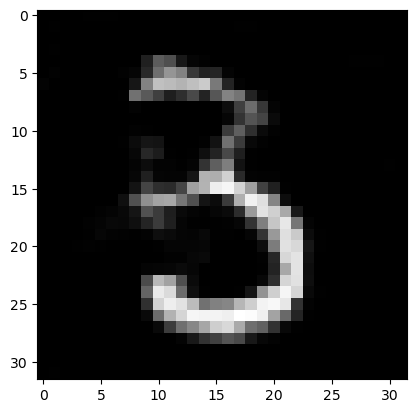

In [27]:
def generate_single_label_image(gen, desired_label):
    """
    Generuje obraz o żądanej etykiecie. \n
    Argumenty: \n
    - gen - wytrenowany model Generatora, \n
    - desired_digit - etykieta, na podstawie której ma zostać wygenerowany obraz.
    """
    gen.eval()
    noise = generate_noise(1, NOISE_SIZE)
    label = torch.tensor([desired_label]).to(device)
    fake_img = gen(noise, label)
    fake_img = (fake_img + 1) / 2
    fake_img = fake_img.squeeze()
    plt.imshow(fake_img.cpu().detach().numpy(), cmap='gray')  # tutaj musimy wykonać obliczenia na CPU
    plt.show()

# wygeneruj cyfrę 3 na już wytrenowanym Generatorze
generated_image = generate_single_label_image(gen, 3)

Wyszkolony Generator potrafi wygenerować obraz o danej etykiecie, zgodnie z rzeczywistymi obrazami ze zbioru.

### Trening sieci cGAN z wykorzystaniem zbioru FashionMNIST
Ten sam proces treningu sieci cGAN przeprowadzono na innym zbiorze danych - FashionMNIST.

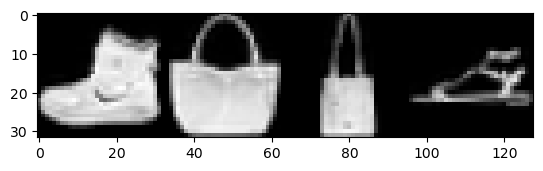

In [28]:
dataset, data_loader, dataset_path, samples_path = set_dataset('FashionMNIST')
show_example_images(dataset)

[ 1/10][      1][    0.04s]	d_loss/g_loss:  2.2/1.2e+01
[ 1/10][    101][    4.06s]	d_loss/g_loss: 0.06/ 8.0
[ 1/10][    201][    7.92s]	d_loss/g_loss: 0.0061/ 6.3
[ 1/10][    301][   11.84s]	d_loss/g_loss: 0.024/ 4.9
[ 1/10][    401][   15.72s]	d_loss/g_loss: 0.036/ 4.9
[ 1/10][    501][   19.66s]	d_loss/g_loss: 0.0058/ 5.8
[ 1/10][    601][   23.71s]	d_loss/g_loss: 0.013/ 6.3
[ 1/10][    701][   27.72s]	d_loss/g_loss: 0.031/ 5.5
[ 1/10][    801][   31.74s]	d_loss/g_loss: 0.0077/ 7.4
[ 1/10][    901][   35.62s]	d_loss/g_loss: 0.031/ 4.4


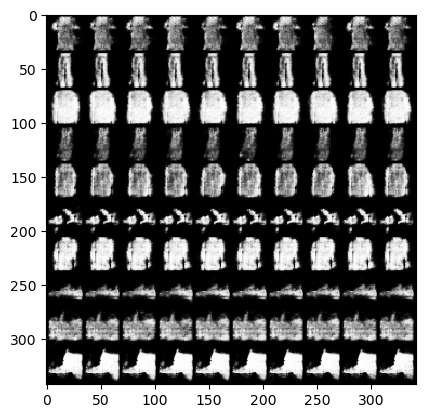

[ 2/10][    938][   37.15s]	d_loss/g_loss: 0.21/ 4.9
[ 2/10][   1038][   41.02s]	d_loss/g_loss: 0.027/ 5.1
[ 2/10][   1138][   45.13s]	d_loss/g_loss: 0.04/ 6.0
[ 2/10][   1238][   48.98s]	d_loss/g_loss: 0.039/ 5.5
[ 2/10][   1338][   52.85s]	d_loss/g_loss: 0.021/ 4.1
[ 2/10][   1438][   56.91s]	d_loss/g_loss: 0.01/ 5.4
[ 2/10][   1538][   60.99s]	d_loss/g_loss: 0.015/ 5.3
[ 2/10][   1638][   65.04s]	d_loss/g_loss: 0.097/ 7.8
[ 2/10][   1738][   69.06s]	d_loss/g_loss: 0.05/ 7.9
[ 2/10][   1838][   73.34s]	d_loss/g_loss: 0.014/ 6.1


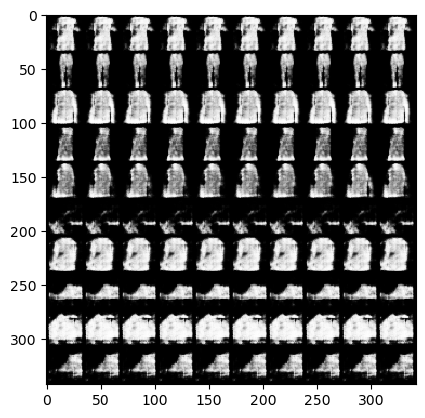

[ 3/10][   1875][   75.38s]	d_loss/g_loss: 0.054/ 5.3
[ 3/10][   1975][   80.46s]	d_loss/g_loss: 0.029/ 4.8
[ 3/10][   2075][   85.42s]	d_loss/g_loss: 0.03/ 6.2
[ 3/10][   2175][   89.31s]	d_loss/g_loss: 0.0083/ 6.6
[ 3/10][   2275][   93.22s]	d_loss/g_loss: 0.024/ 5.2
[ 3/10][   2375][   97.08s]	d_loss/g_loss: 0.053/ 6.3
[ 3/10][   2475][  100.92s]	d_loss/g_loss: 0.022/ 4.8
[ 3/10][   2575][  104.78s]	d_loss/g_loss: 0.15/1.2e+01
[ 3/10][   2675][  108.63s]	d_loss/g_loss: 0.034/ 5.9
[ 3/10][   2775][  112.47s]	d_loss/g_loss: 0.028/ 8.7


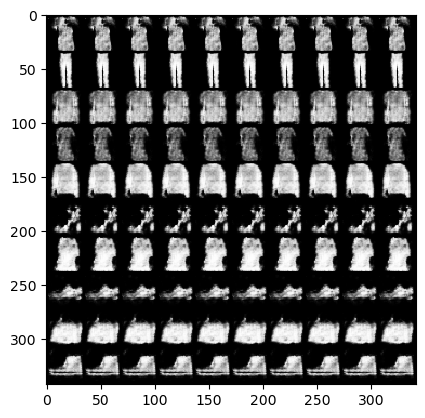

[ 4/10][   2812][  114.00s]	d_loss/g_loss: 0.0038/ 6.2
[ 4/10][   2912][  118.07s]	d_loss/g_loss: 0.043/ 5.2
[ 4/10][   3012][  121.93s]	d_loss/g_loss: 0.025/ 5.9
[ 4/10][   3112][  125.78s]	d_loss/g_loss: 0.011/ 7.2
[ 4/10][   3212][  129.63s]	d_loss/g_loss: 0.017/ 5.0
[ 4/10][   3312][  133.48s]	d_loss/g_loss: 0.13/ 7.6
[ 4/10][   3412][  137.33s]	d_loss/g_loss: 0.016/ 5.6
[ 4/10][   3512][  141.40s]	d_loss/g_loss: 0.011/ 5.3
[ 4/10][   3612][  145.37s]	d_loss/g_loss: 0.028/ 4.7
[ 4/10][   3712][  149.22s]	d_loss/g_loss: 0.026/ 5.7


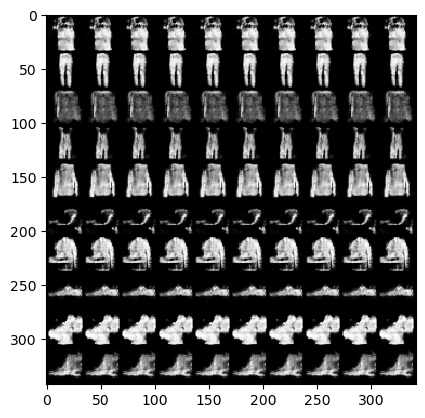

[ 5/10][   3749][  150.74s]	d_loss/g_loss: 0.011/ 5.3
[ 5/10][   3849][  154.75s]	d_loss/g_loss: 0.0028/ 7.1
[ 5/10][   3949][  158.72s]	d_loss/g_loss: 0.027/ 5.7
[ 5/10][   4049][  162.63s]	d_loss/g_loss: 0.076/ 4.5
[ 5/10][   4149][  166.68s]	d_loss/g_loss: 0.014/ 5.3
[ 5/10][   4249][  170.77s]	d_loss/g_loss: 0.009/ 5.5
[ 5/10][   4349][  175.38s]	d_loss/g_loss: 0.016/ 5.5
[ 5/10][   4449][  180.42s]	d_loss/g_loss: 0.03/ 7.2
[ 5/10][   4549][  185.42s]	d_loss/g_loss: 0.0051/ 5.5
[ 5/10][   4649][  190.43s]	d_loss/g_loss: 0.005/ 8.8


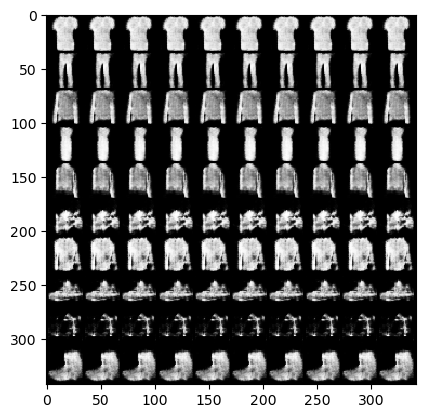

[ 6/10][   4686][  192.50s]	d_loss/g_loss: 0.023/ 6.1
[ 6/10][   4786][  197.52s]	d_loss/g_loss: 0.088/ 9.4
[ 6/10][   4886][  202.54s]	d_loss/g_loss: 0.031/ 4.9
[ 6/10][   4986][  207.68s]	d_loss/g_loss: 0.036/ 4.9
[ 6/10][   5086][  212.13s]	d_loss/g_loss: 0.0086/ 5.4
[ 6/10][   5186][  215.99s]	d_loss/g_loss: 0.011/ 5.6
[ 6/10][   5286][  219.87s]	d_loss/g_loss: 0.023/ 7.7
[ 6/10][   5386][  223.74s]	d_loss/g_loss: 0.019/ 6.1
[ 6/10][   5486][  227.65s]	d_loss/g_loss: 0.013/ 6.6
[ 6/10][   5586][  231.55s]	d_loss/g_loss: 0.042/ 7.5


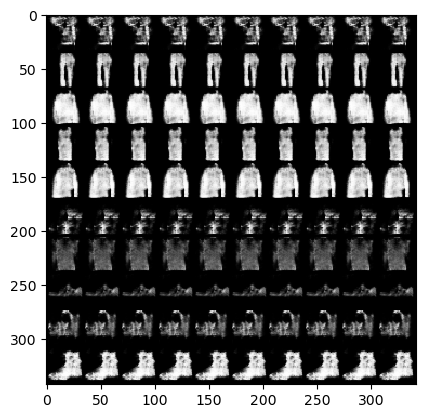

[ 7/10][   5623][  233.09s]	d_loss/g_loss: 0.012/ 5.5
[ 7/10][   5723][  237.07s]	d_loss/g_loss: 0.94/2.2e+01
[ 7/10][   5823][  241.21s]	d_loss/g_loss: 0.19/1.2e+01
[ 7/10][   5923][  245.09s]	d_loss/g_loss: 0.019/ 7.5
[ 7/10][   6023][  248.95s]	d_loss/g_loss: 0.037/ 8.0
[ 7/10][   6123][  252.81s]	d_loss/g_loss: 0.025/ 9.5
[ 7/10][   6223][  256.66s]	d_loss/g_loss: 0.77/1.7e+01
[ 7/10][   6323][  260.50s]	d_loss/g_loss: 0.078/ 7.6
[ 7/10][   6423][  264.33s]	d_loss/g_loss: 0.029/ 4.9
[ 7/10][   6523][  268.17s]	d_loss/g_loss: 0.015/ 6.7


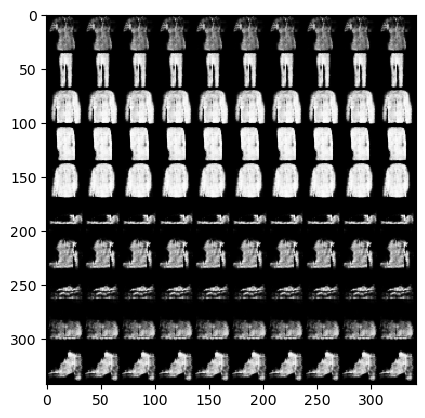

[ 8/10][   6560][  269.69s]	d_loss/g_loss: 0.018/ 6.4
[ 8/10][   6660][  273.51s]	d_loss/g_loss: 0.003/ 7.1
[ 8/10][   6760][  277.47s]	d_loss/g_loss: 0.012/ 5.3
[ 8/10][   6860][  281.37s]	d_loss/g_loss: 0.022/ 4.9
[ 8/10][   6960][  285.44s]	d_loss/g_loss: 0.088/ 8.6
[ 8/10][   7060][  290.37s]	d_loss/g_loss: 0.0078/ 5.7
[ 8/10][   7160][  295.34s]	d_loss/g_loss: 0.037/ 5.4
[ 8/10][   7260][  299.21s]	d_loss/g_loss: 0.0037/ 5.9
[ 8/10][   7360][  303.06s]	d_loss/g_loss: 0.019/ 9.7
[ 8/10][   7460][  306.91s]	d_loss/g_loss: 0.048/ 5.8


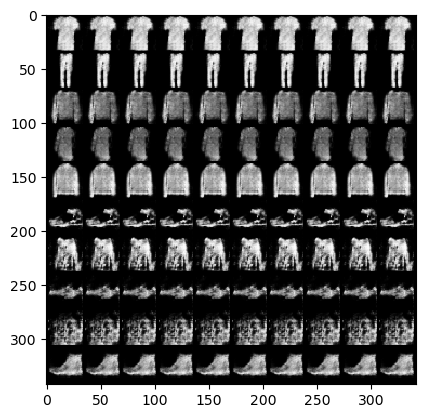

[ 9/10][   7497][  308.44s]	d_loss/g_loss: 0.0032/1e+01
[ 9/10][   7597][  312.37s]	d_loss/g_loss: 0.013/ 5.6
[ 9/10][   7697][  316.24s]	d_loss/g_loss: 0.035/ 4.8
[ 9/10][   7797][  320.11s]	d_loss/g_loss: 0.027/ 5.2
[ 9/10][   7897][  323.96s]	d_loss/g_loss: 0.0081/ 6.2
[ 9/10][   7997][  327.82s]	d_loss/g_loss: 0.045/1e+01
[ 9/10][   8097][  331.67s]	d_loss/g_loss: 0.077/ 4.0
[ 9/10][   8197][  335.52s]	d_loss/g_loss: 0.0062/ 8.4
[ 9/10][   8297][  339.35s]	d_loss/g_loss: 0.0079/ 6.4
[ 9/10][   8397][  343.21s]	d_loss/g_loss: 0.022/ 5.6


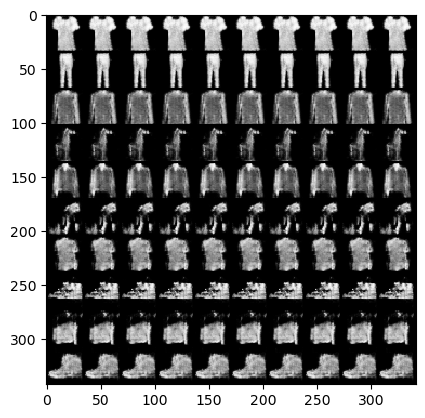

[10/10][   8434][  344.75s]	d_loss/g_loss: 0.0038/ 6.6
[10/10][   8534][  348.79s]	d_loss/g_loss: 0.045/ 3.3
[10/10][   8634][  352.67s]	d_loss/g_loss: 0.047/ 5.4
[10/10][   8734][  356.54s]	d_loss/g_loss: 0.019/ 5.0
[10/10][   8834][  360.41s]	d_loss/g_loss: 0.02/ 8.7
[10/10][   8934][  364.29s]	d_loss/g_loss: 0.011/ 5.4
[10/10][   9034][  368.15s]	d_loss/g_loss: 0.02/ 7.2
[10/10][   9134][  372.03s]	d_loss/g_loss: 0.017/ 6.8
[10/10][   9234][  375.92s]	d_loss/g_loss: 0.0057/ 5.8
[10/10][   9334][  379.79s]	d_loss/g_loss: 0.0022/ 7.7


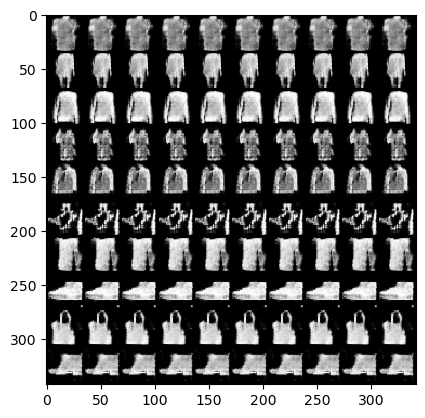

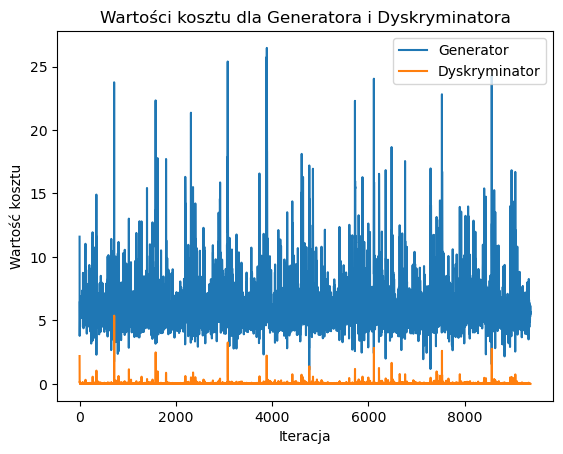

Elapsed time:  381.41s	d_loss/g_loss: 0.0048/ 5.6	mean d_loss/g_loss: 0.039/ 6.3


In [29]:
train_cgan(data_loader, NOISE_SIZE)

W przypadku zbioru FashionMNIST możemy zauważyć, że wartości kosztów Generatora są raczej niezmienne od iteracji.
W porównaniu do MNIST średnie wartości kosztu Dyskryminatora są mniejsze, natomiast Generatora większe.

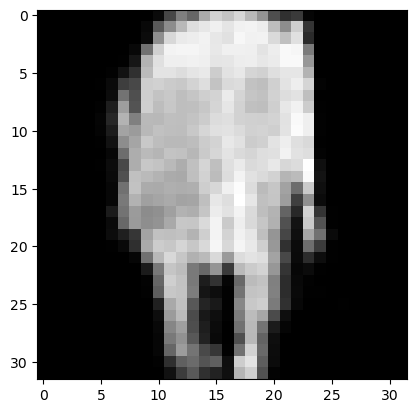

In [30]:
# Na już wytrenowanym Generatorze, wygeneruj obrazek o kategorii/etykiecie odzieży 1 (tutaj spodnie)
generate_single_label_image(gen, 1)

### Trening sieci cGAN z wykorzystaniem zbioru KMNIST

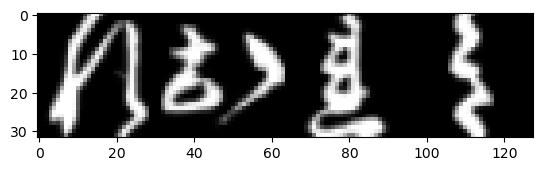

In [31]:
dataset, data_loader, dataset_path, samples_path = set_dataset('KMNIST')
show_example_images(dataset)

[ 1/10][      1][    0.04s]	d_loss/g_loss:  3.2/2.7e+01
[ 1/10][    101][    3.98s]	d_loss/g_loss: 0.015/ 4.5
[ 1/10][    201][    7.81s]	d_loss/g_loss: 0.011/ 5.3
[ 1/10][    301][   11.69s]	d_loss/g_loss: 0.0098/ 5.6
[ 1/10][    401][   15.73s]	d_loss/g_loss: 0.0022/ 6.0
[ 1/10][    501][   19.77s]	d_loss/g_loss: 0.0032/ 5.9
[ 1/10][    601][   23.76s]	d_loss/g_loss: 0.0044/ 6.9
[ 1/10][    701][   27.76s]	d_loss/g_loss: 0.005/ 6.2
[ 1/10][    801][   31.64s]	d_loss/g_loss: 0.01/ 7.4
[ 1/10][    901][   35.69s]	d_loss/g_loss: 0.0074/ 7.5


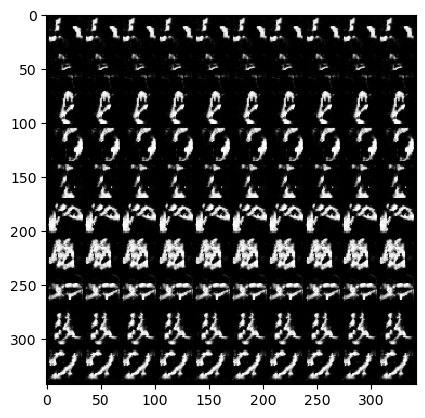

[ 2/10][    938][   37.25s]	d_loss/g_loss: 0.0068/ 6.3
[ 2/10][   1038][   42.44s]	d_loss/g_loss: 0.0023/ 6.9
[ 2/10][   1138][   47.52s]	d_loss/g_loss: 0.008/ 7.7
[ 2/10][   1238][   52.70s]	d_loss/g_loss: 0.004/ 7.0
[ 2/10][   1338][   57.84s]	d_loss/g_loss: 0.00091/ 8.3
[ 2/10][   1438][   62.97s]	d_loss/g_loss: 0.0016/ 6.9
[ 2/10][   1538][   68.10s]	d_loss/g_loss: 0.013/ 5.5
[ 2/10][   1638][   73.18s]	d_loss/g_loss: 0.01/ 5.5
[ 2/10][   1738][   78.27s]	d_loss/g_loss: 0.019/ 5.6
[ 2/10][   1838][   83.33s]	d_loss/g_loss: 6.6e-05/1.8e+01


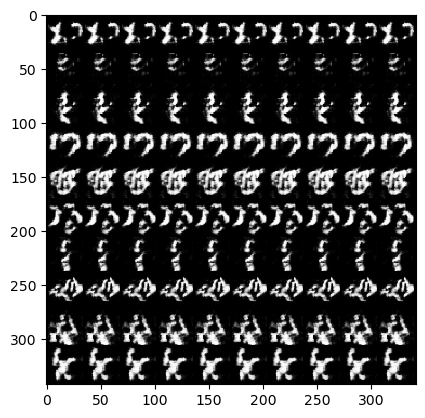

[ 3/10][   1875][   85.39s]	d_loss/g_loss: 0.0055/1.4e+01
[ 3/10][   1975][   90.55s]	d_loss/g_loss: 0.0042/ 6.3
[ 3/10][   2075][   95.55s]	d_loss/g_loss: 0.003/ 6.8
[ 3/10][   2175][  100.54s]	d_loss/g_loss: 0.012/ 5.2
[ 3/10][   2275][  105.48s]	d_loss/g_loss: 0.031/ 4.7
[ 3/10][   2375][  110.52s]	d_loss/g_loss: 0.0061/ 6.5
[ 3/10][   2475][  115.77s]	d_loss/g_loss: 0.0013/ 7.5
[ 3/10][   2575][  120.85s]	d_loss/g_loss: 0.0032/ 6.3
[ 3/10][   2675][  125.88s]	d_loss/g_loss: 0.0058/ 7.7
[ 3/10][   2775][  130.96s]	d_loss/g_loss: 0.024/ 6.2


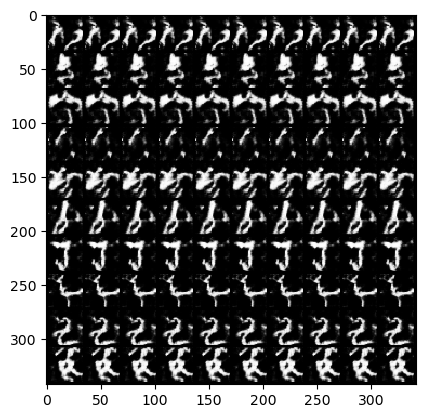

[ 4/10][   2812][  133.00s]	d_loss/g_loss: 0.00063/ 7.3
[ 4/10][   2912][  138.24s]	d_loss/g_loss: 0.0012/ 8.3
[ 4/10][   3012][  143.32s]	d_loss/g_loss: 0.0021/1.2e+01
[ 4/10][   3112][  148.34s]	d_loss/g_loss: 0.0035/ 6.4
[ 4/10][   3212][  153.46s]	d_loss/g_loss: 0.0014/2e+01
[ 4/10][   3312][  158.63s]	d_loss/g_loss: 0.0055/ 6.4
[ 4/10][   3412][  163.09s]	d_loss/g_loss: 0.00058/1e+01
[ 4/10][   3512][  167.16s]	d_loss/g_loss: 0.0047/1.3e+01
[ 4/10][   3612][  171.16s]	d_loss/g_loss: 0.0048/ 6.4
[ 4/10][   3712][  175.17s]	d_loss/g_loss: 0.0062/ 9.8


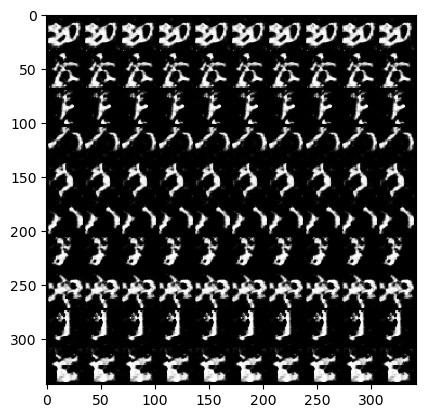

[ 5/10][   3749][  176.74s]	d_loss/g_loss: 0.0068/ 6.0
[ 5/10][   3849][  180.73s]	d_loss/g_loss: 0.0051/ 6.9
[ 5/10][   3949][  184.69s]	d_loss/g_loss: 0.0012/1e+01
[ 5/10][   4049][  188.75s]	d_loss/g_loss: 0.011/ 9.0
[ 5/10][   4149][  192.90s]	d_loss/g_loss: 0.006/ 7.1
[ 5/10][   4249][  196.99s]	d_loss/g_loss: 0.0057/ 5.6
[ 5/10][   4349][  201.08s]	d_loss/g_loss: 0.0024/ 6.7
[ 5/10][   4449][  205.04s]	d_loss/g_loss: 0.0043/ 5.7
[ 5/10][   4549][  209.02s]	d_loss/g_loss: 0.0073/ 6.8
[ 5/10][   4649][  212.96s]	d_loss/g_loss: 0.0057/ 7.7


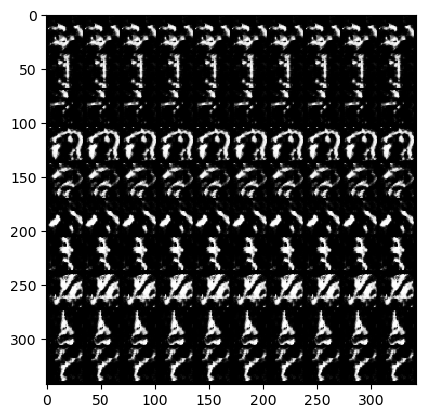

[ 6/10][   4686][  214.87s]	d_loss/g_loss: 0.0052/ 5.6
[ 6/10][   4786][  218.83s]	d_loss/g_loss: 0.019/ 5.6
[ 6/10][   4886][  222.91s]	d_loss/g_loss: 0.013/ 6.4
[ 6/10][   4986][  227.09s]	d_loss/g_loss: 0.0028/ 6.9
[ 6/10][   5086][  231.14s]	d_loss/g_loss: 0.0045/ 5.9
[ 6/10][   5186][  235.59s]	d_loss/g_loss: 0.0021/ 6.4
[ 6/10][   5286][  240.64s]	d_loss/g_loss: 0.0014/ 6.8
[ 6/10][   5386][  245.75s]	d_loss/g_loss: 0.0022/ 8.4
[ 6/10][   5486][  250.83s]	d_loss/g_loss: 0.0015/ 8.3
[ 6/10][   5586][  255.87s]	d_loss/g_loss: 0.01/ 5.7


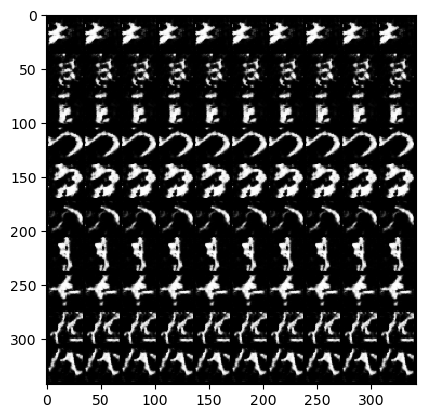

[ 7/10][   5623][  257.93s]	d_loss/g_loss: 0.002/ 9.7
[ 7/10][   5723][  263.10s]	d_loss/g_loss: 0.0062/ 6.3
[ 7/10][   5823][  268.22s]	d_loss/g_loss: 0.0053/ 6.6
[ 7/10][   5923][  273.25s]	d_loss/g_loss: 0.0076/ 8.3
[ 7/10][   6023][  278.25s]	d_loss/g_loss: 0.0064/ 5.8
[ 7/10][   6123][  283.29s]	d_loss/g_loss: 0.0046/ 5.9
[ 7/10][   6223][  288.43s]	d_loss/g_loss: 0.0015/1.7e+01
[ 7/10][   6323][  293.55s]	d_loss/g_loss: 0.085/ 7.1
[ 7/10][   6423][  298.71s]	d_loss/g_loss: 0.0049/ 7.3
[ 7/10][   6523][  303.95s]	d_loss/g_loss: 0.0073/ 6.7


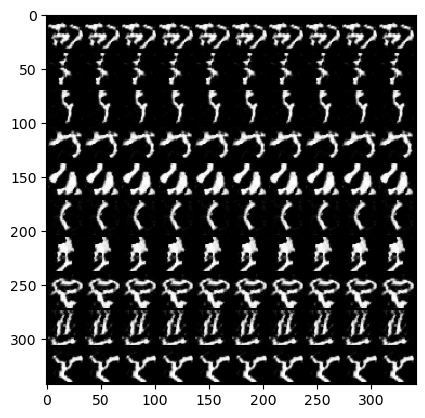

[ 8/10][   6560][  306.12s]	d_loss/g_loss: 0.0078/ 6.1
[ 8/10][   6660][  311.32s]	d_loss/g_loss: 0.0036/ 6.3
[ 8/10][   6760][  316.57s]	d_loss/g_loss: 0.0024/ 9.7
[ 8/10][   6860][  321.72s]	d_loss/g_loss: 0.018/ 5.0
[ 8/10][   6960][  326.95s]	d_loss/g_loss: 0.0039/ 6.4
[ 8/10][   7060][  332.16s]	d_loss/g_loss: 0.0019/ 6.8
[ 8/10][   7160][  337.34s]	d_loss/g_loss: 0.00097/ 7.2
[ 8/10][   7260][  342.52s]	d_loss/g_loss: 0.0042/ 6.0
[ 8/10][   7360][  347.71s]	d_loss/g_loss: 0.0007/ 8.2
[ 8/10][   7460][  352.89s]	d_loss/g_loss: 0.00099/ 7.0


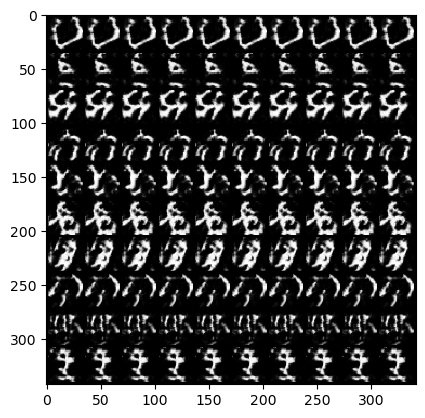

[ 9/10][   7497][  354.94s]	d_loss/g_loss: 0.0022/ 6.4
[ 9/10][   7597][  360.07s]	d_loss/g_loss: 0.0013/ 8.1
[ 9/10][   7697][  365.10s]	d_loss/g_loss: 0.0011/ 7.0
[ 9/10][   7797][  370.22s]	d_loss/g_loss: 0.0006/1e+01
[ 9/10][   7897][  375.57s]	d_loss/g_loss: 0.0025/ 7.4
[ 9/10][   7997][  380.84s]	d_loss/g_loss: 0.0038/1.4e+01
[ 9/10][   8097][  385.84s]	d_loss/g_loss: 0.025/ 5.2
[ 9/10][   8197][  390.76s]	d_loss/g_loss: 0.0037/ 7.8
[ 9/10][   8297][  394.93s]	d_loss/g_loss: 0.0021/ 8.8
[ 9/10][   8397][  398.82s]	d_loss/g_loss: 0.026/ 9.1


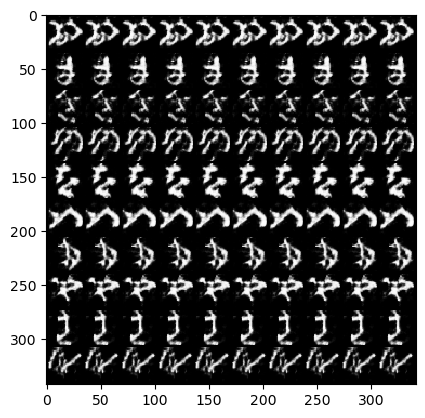

[10/10][   8434][  400.47s]	d_loss/g_loss: 0.014/ 6.4
[10/10][   8534][  404.44s]	d_loss/g_loss: 0.026/ 5.7
[10/10][   8634][  408.37s]	d_loss/g_loss: 0.0059/1.3e+01
[10/10][   8734][  412.30s]	d_loss/g_loss: 0.005/1.3e+01
[10/10][   8834][  416.23s]	d_loss/g_loss: 0.0018/ 7.2
[10/10][   8934][  420.13s]	d_loss/g_loss: 0.0033/ 6.9
[10/10][   9034][  424.17s]	d_loss/g_loss: 0.00028/2.2e+01
[10/10][   9134][  428.17s]	d_loss/g_loss: 0.014/ 6.1
[10/10][   9234][  432.30s]	d_loss/g_loss: 0.0017/1.2e+01
[10/10][   9334][  436.29s]	d_loss/g_loss: 0.0027/ 8.9


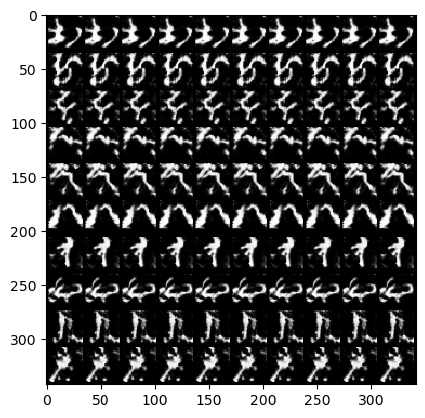

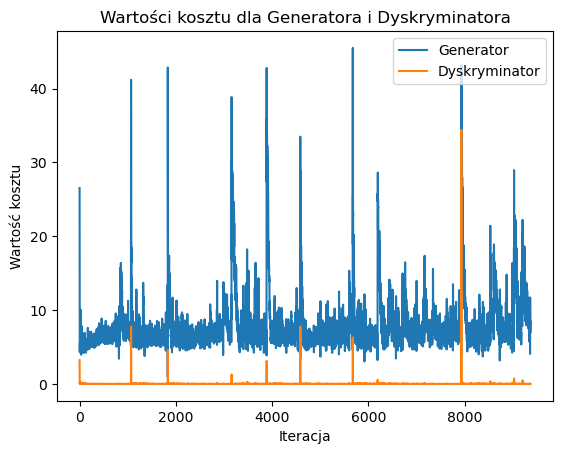

Elapsed time:  438.18s	d_loss/g_loss: 0.0013/ 8.4	mean d_loss/g_loss: 0.021/ 7.9


In [32]:
train_cgan(data_loader, NOISE_SIZE)

W przypadku zbioru KMNIST średnie wartości kosztu są dosyć zbliżone do wartości kosztów ze zbioru FashionMNIST.

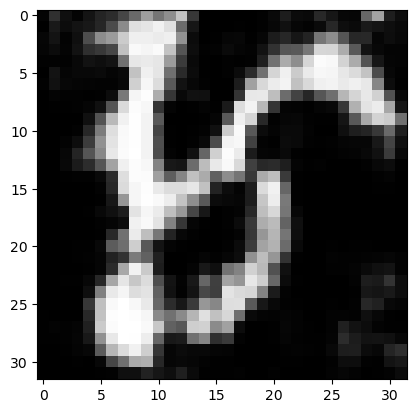

In [33]:
generate_single_label_image(gen, 1)

# Podsumowanie
Tematem projektu było wykorzystanie warunkowych sieci GAN (cGAN) do generacji obrazów. Cel projektu został zrealizowany poprzez zbudowanie sieci cGAN, doboru odpowiednich zbiorów danych, przeprowadzenie treningu oraz testowanie modelu. Po treningu sieci cGAN widać już po pierwszej epoce, że Generator jest w stanie wygenerować odpowiednie obrazy. Taki efekt można zauważyć zarówno w zbiorczej siatce wygenerowanych obrazów oraz pojedynczym obrazie wygenerowanym na żądanie.

W zależności od doboru zbioru danych zauważyć można różne wartości kosztów dla Generatora i Dyskryminatora, choć te ze zbioru FashionMNIST i KMNIST są zbliżone. Ponadto można wyciągnąć wnioski, że niekoniecznie większa liczba epok pozytywnie wpływa na jakość wygenerowanych obrazów i wartości kosztów. W przypadku niniejszego projektu, do wyszkolenia sieci cGAN wystarczy jedna epoka, co daje ok. 1000 iteracji.

Na podstawie powyższych wniosków można stwierdzić, że cel i zakres projektu został zrealizowany.

Realizacja niniejszego projektu poszerzyła umiejętności programowania w języku Python i bibliotece PyTorch, a także zwiększyła świadomość istoty doboru odpowiedniej jednostki obliczeniowej, a także zaznajomiła autora z technologią CUDA.